# Docsumo Workshop Day 3



In [9]:
!cat requirements.txt

jupyterlab==3.4.8
matplotlib==3.6.3
numpy==1.24.2
opencv-python==4.7.0.68
pandas==1.5.3
Pillow==9.4.0
scikit-image==0.19.3
scipy==1.10.0


## Contents

- Introduction to Computer Vision
- Images and their properties
    - RGB image and Grayscale image
- Edge Detection
    - Example: Canny edge detector
- Image Filtering and Sharpening
- Face detection
- Tools
    - OpenCv
    - Skimage

## Resources and References [This notebook uses the following resources]

- https://fpcv.cs.columbia.edu/  [First Principles of Computer Vision]


# What is computer vision

- https://www.youtube.com/watch?v=wVE8SFMSBJ0 
- https://cave.cs.columbia.edu/Statics/monographs/Introduction%20FPCV-0-1.pdf 

- Buliding machines that can see

- Human vision tends to be more qualitative than quantitative

- a computer vision system can be designed to surpass the capability of human vision and extract information about the world that we simply cannot

## Computer Vision is
- automating human visual processes
- an information processing task

# Images and their properties
- https://towardsdatascience.com/exploring-the-mnist-digits-dataset-7ff62631766a

## How is image stored in computer 
- https://codeburst.io/how-are-images-stored-on-a-computer-353ac16b6d8f

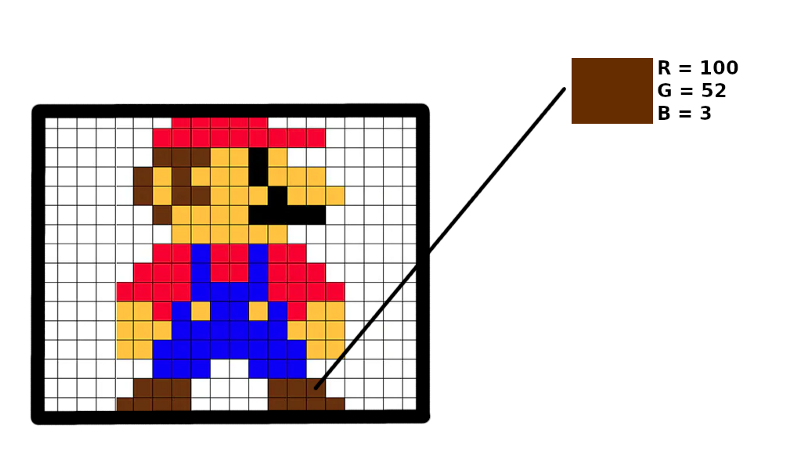

## An Image is an **Array of Pixels**

*Matrix containing pixel values*

## But agian what is pixel(s)
A Pixel has Values like(optional)
- Brightness
- Color

- Distance
- Material
- ...

of the corresponding point in the scene

## Other Properties

- Size 
    - Width
    - Height
- Color Space
    - RGB (Red, Green, Blue)
    - HSV (hue, saturation, value\(brightness))
- Channel
    - attribute of the color space.

## RGB And Grayscale image

- Grayscale Images
  - Single Color Channel
  - Pixel Value [0, 255]
- RGB Images
  - Three color channel
  - Each Pixel Value [0, 255]

# Information in vision and complexity of vision problems

In [15]:
from skimage import io, img_as_float
import numpy as np
# from PIL import Image
import cv2
import glob
from scipy import ndimage

import matplotlib.pyplot as plt
%matplotlib inline

(1929, 2958, 3)


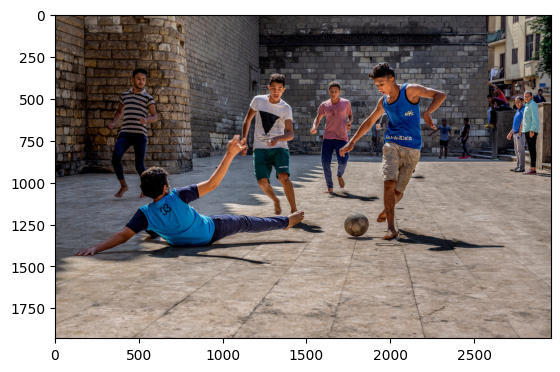

In [20]:
my_image = io.imread("./data/Boys_playing_street_football_in_Egypt.jpg")
print(my_image.shape)
plt.imshow(my_image)

Information we can see in a fraction of seconds

- No of persons in the image
- Which sport
- Weather
- Emotion of the persons
- And more..

Lets have a closer look at the digital equivalent of the image shown

In [28]:
from pprint import pprint

In [35]:
my_image[200:210, 500:510, 0]

array([[113, 102,  85,  88,  91,  93,  91,  89,  87,  91],
       [111, 103,  84,  81,  85,  84,  78,  79,  83,  86],
       [113, 103,  82,  77,  89,  85,  75,  72,  75,  79],
       [113, 108,  96,  86,  89,  86,  72,  68,  73,  78],
       [110, 109, 102,  94,  95,  90,  75,  73,  77,  72],
       [101,  98,  96, 101, 102,  91,  81,  78,  75,  67],
       [ 75,  77,  82,  93,  96,  85,  82,  80,  76,  74],
       [ 57,  62,  69,  78,  81,  80,  80,  76,  79,  77],
       [ 41,  48,  57,  66,  77,  83,  81,  78,  80,  74],
       [ 34,  42,  46,  53,  68,  71,  77,  78,  77,  80]], dtype=uint8)

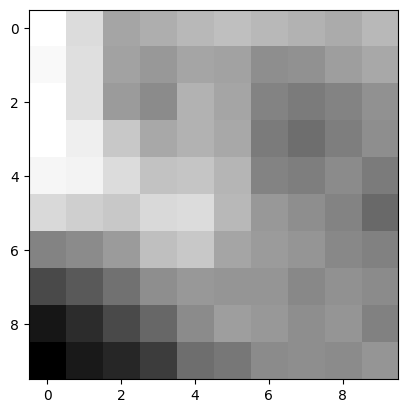

In [37]:
# plt.imshow(my_image[200:205, 500:505, :])
plt.imshow(my_image[200:210, 500:510, 0], cmap="gray")

It is from these numbers that we seek to extract all the information

## Examples checkpoint

In [48]:
from skimage.transform import rescale, resize, downscale_local_mean
from skimage.filters import roberts, sobel, scharr, prewitt
from skimage.color import rgb2gray

### RGB Pixel value

In [53]:
print(f"Shape of image is {my_image.shape}")
my_image[0, 0, :]

Shape of image is (1929, 2958, 3)


array([116, 103,  94], dtype=uint8)

### Gray Scale Value
- https://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_rgb_to_gray.html

In [59]:
def to_gray_uint(image):
    return np.uint8(image * 255)

Shape of image is (1929, 2958)


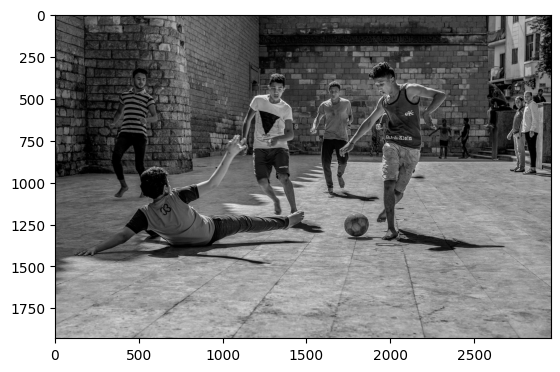

In [60]:
g_image = rgb2gray(my_image)
g_image = to_gray_uint(g_image)
print(f"Shape of image is {g_image.shape}")
plt.imshow(g_image, cmap='gray')

In [61]:
g_image[0, 0]

105

# Filtering, Edge Detection